---
title: "AM Peak travel distance skim for SOV NT"
format: 
  html: 
    toc: true
    css: styles.css
jupyter: python3
execute:
  echo: false
---

In [1]:
from util import Skim
from config import scenarioPath_OpenPath
from config import scenarioPath_EMME437

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

Comparison table of select matrix from AM Peak traffic skim (top 5)

In [3]:
comparison = Skim.comparison(scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'traffic')
comparison.sort_values(by='SOV_NT_M_DIST__AM', ascending=False).head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'blue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,SOV_NT_M_DIST__AM
4908,1383,12.414185
535,71,11.900368
489,71,11.590210
4762,4521,11.154755
4867,1108,11.036835


Summary of Comparison on SOV_NT_M_DIST__AM between EMME OpenPath and EMME437

In [4]:
comparison.SOV_NT_M_DIST__AM.describe()

count    2.447281e+07
mean     1.654333e-02
std      2.743037e-01
min     -1.257166e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.241418e+01
Name: SOV_NT_M_DIST__AM, dtype: float64

Intercept: 0.0015
Slope: 0.9993
R² Score: 0.9997
RMSE: 0.2741


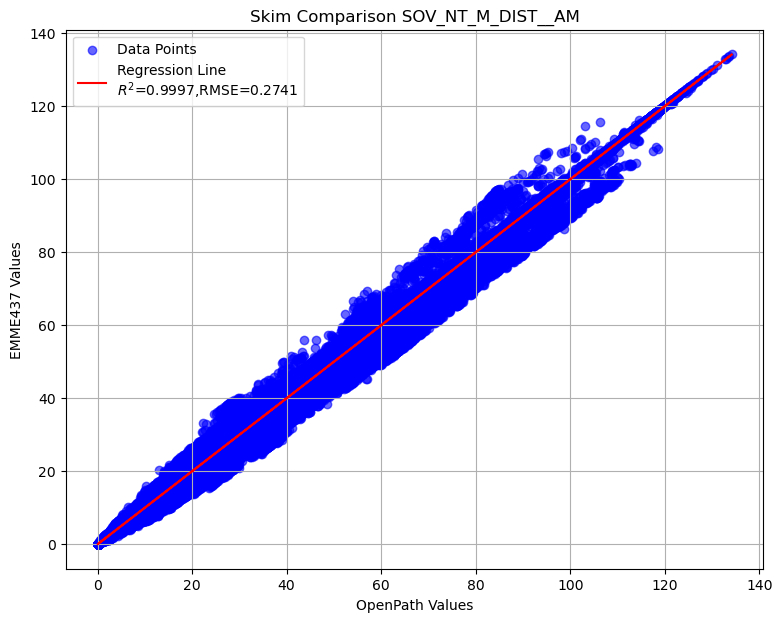

In [5]:
Skim.regression_scatter_plot('SOV_NT_M_DIST__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'traffic')

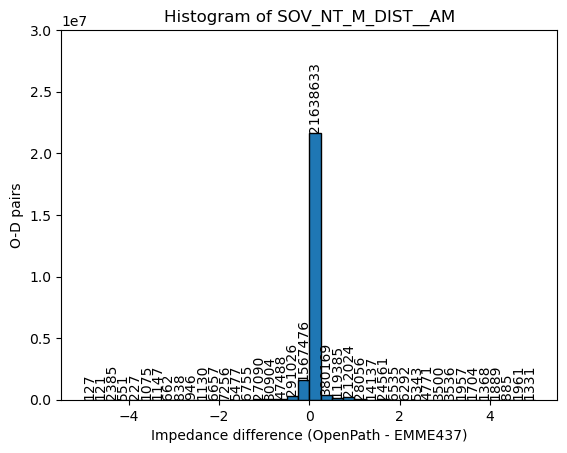

In [6]:
Skim.histogram_plot('SOV_NT_M_DIST__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'traffic')